In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("menu.csv")
df.head()


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [4]:
features = df[['Calories', 'Total Fat', 'Sugars', 'Protein']]
features = features.dropna()
features.head()


,Calories,Total Fat,Sugars,Protein
0,300,13.0,3,17
1,250,8.0,3,18
2,370,23.0,2,14
3,450,28.0,2,21
4,400,23.0,2,21


In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

clusters = kmeans.fit_predict(scaled_features)

features['Cluster'] = clusters
features.head()


C:\Users\rpere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Calories,Total Fat,Sugars,Protein,Cluster
0,300,13.0,3,17,2
1,250,8.0,3,18,2
2,370,23.0,2,14,1
3,450,28.0,2,21,1
4,400,23.0,2,21,1


In [9]:
features.groupby('Cluster').mean()


,Calories,Total Fat,Sugars,Protein
Cluster,,,,
0,564.651163,18.302326,75.953488,13.720930
1,560.394737,29.000000,7.684211,26.394737
2,204.822695,4.907801,26.950355,6.184397


Cluster Interpretation

- Cluster 0 represents high-calorie, high-sugar menu items and is classified as **Unhealthy**.
- Cluster 1 contains high-calorie, high-fat, high-protein items and is classified as **Moderate Risk**.
- Cluster 2 consists of lower-calorie and lower-fat items and is classified as **Healthy Options**.

This clustering demonstrates how unsupervised learning can segment food items based on nutritional characteristics.


In [10]:
cluster_labels = {
    0: "Unhealthy (High Sugar)",
    1: "Moderate (High Fat)",
    2: "Healthy"
}

features['Health_Category'] = features['Cluster'].map(cluster_labels)
features.head()


,Calories,Total Fat,Sugars,Protein,Cluster,Health_Category
0,300,13.0,3,17,2,Healthy
1,250,8.0,3,18,2,Healthy
2,370,23.0,2,14,1,Moderate (High Fat)
3,450,28.0,2,21,1,Moderate (High Fat)
4,400,23.0,2,21,1,Moderate (High Fat)


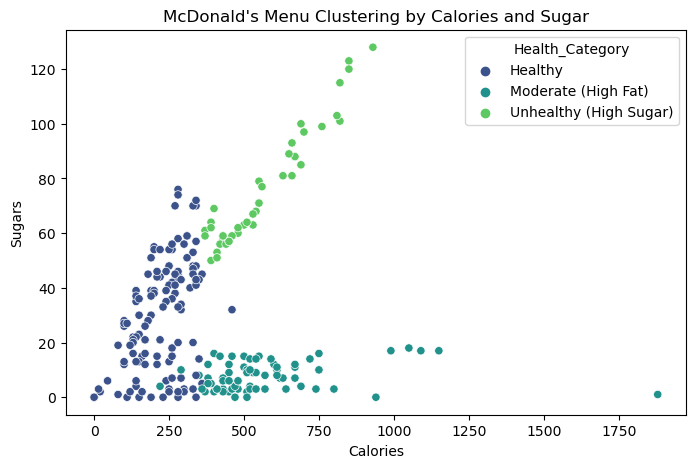

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=features['Calories'],
    y=features['Sugars'],
    hue=features['Health_Category'],
    palette='viridis'
)
plt.title("McDonald's Menu Clustering by Calories and Sugar")
plt.savefig("cluster_plot.png", bbox_inches='tight')
plt.show()
